In [1]:
import pandas as pd 
import matplotlib.pyplot as plt


# Data Exploration

In [2]:
df = pd.read_csv('Coding CBS/NLP/MA 2/CyberBullying Comments Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11100 entries, 0 to 11099
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      11100 non-null  object
 1   CB_Label  11100 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 173.6+ KB


(array([5550.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5550.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

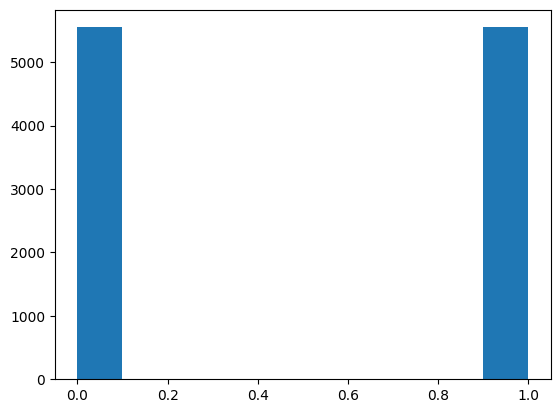

In [3]:
plt.hist(df.CB_Label)

the data is evenly distributed and does not have any null values

# Data Preprocessing

In [5]:
# (1.1)

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download the required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the lemmatizer and stopwords list
lem = WordNetLemmatizer()
stop_words = stopwords.words('english')

def data_preprocess(text):
    # Tokenize text
    wtokens = word_tokenize(text)

   # Filtering tokens
    t_filtered = []
    for t in wtokens:
        # Convert token to lowercase and check if it's not in stopwords and is alphabetic
        if t.lower() not in stop_words and t.isalpha():
        # Add the lowercase token to filtered_tokens
            t_filtered.append(t.lower())

# Lemmatization
    t_lemmatized = []
    for t in t_filtered:
    # Lemmatize token
        lemma_t = lem.lemmatize(t)
    # Add lemmatized token to lemmatized_tokens
        t_lemmatized.append(lemma_t)

    # Rejoin the processed tokens into a single string
    return " ".join(t_lemmatized) 

# (1.2)
df['cleaned_text'] = df['Text'].apply(data_preprocess)
df['cleaned_text'].head(15)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/moritzvonbuchwaldt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/moritzvonbuchwaldt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/moritzvonbuchwaldt/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0     damn someone nana beach one dont think ic stea...
1     kidding dick clark corpse mechanically operate...
2     read article jobros thought damn cash jobro po...
3     got one fucking day sprinkle back sunshine dou...
4     already listening elliott smith fucking hate k...
5                  told derek go fuck devyn told u calm
6                  watching new smosh video laughing as
7     mom like catholicism idea sinner birth irked l...
8     ya know lol big thunder mountain broke got rid...
9                                           lucky bitch
10    hate auto dm better way show actually care fol...
11    top notch click dont hate hater u mad cuz u br...
12                question fuck father mia like two day
13    fair enough get as around sometime later voice...
14    yeah seems like got bitch somewhere could brai...
Name: cleaned_text, dtype: object

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer()
#vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df.cleaned_text)
y = df.CB_Label

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y , test_size=0.8)

In [ ]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn import metrics
from prettytable import PrettyTable

models = [BernoulliNB(), GaussianNB(), MultinomialNB()]




table = PrettyTable()
table.field_names = ["Model", "F1 Score", "Accuracy", "Precision", "Recall"]

for m in models:
    print(m)
    model = m.fit(Xtrain.toarray(),ytrain)
    
    pred = model.predict(Xtest.toarray())   
    table.add_row([m, metrics.f1_score(ytest, pred, average='macro'), metrics.accuracy_score(ytest, pred), metrics.precision_score(ytest, pred), metrics.recall_score(ytest, pred)])
table


BernoulliNB()
GaussianNB()
MultinomialNB()


Model,F1 Score,Accuracy,Precision,Recall
BernoulliNB(),0.6869054152495433,0.6872747747747747,0.6938726663475348,0.6593131680691381
GaussianNB(),0.5836851435949382,0.5896396396396396,0.6100555393159894,0.47464180122811006
MultinomialNB(),0.6682143922069068,0.6699324324324324,0.6431081608746584,0.7491471457812144


Ideally we want to minimize the texts with bullying that we miss so Recall is the correct metric to look at. As it shows how many of all Bullying messages classify correctly

In [52]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
print(model)
model = model.fit(Xtrain.toarray(),ytrain)
pred = model.predict(Xtest)
print("F1 Score",metrics.f1_score(ytest, pred, average='macro'))
print("Accuracy",metrics.accuracy_score(ytest, pred))
print("Recall",metrics.recall_score(ytest, pred))
print("Precision",metrics.precision_score(ytest, pred))

table.add_row([model, metrics.f1_score(ytest, pred, average='macro'), metrics.accuracy_score(ytest, pred), metrics.precision_score(ytest, pred), metrics.recall_score(ytest, pred)])



LogisticRegression()
F1 Score 0.6778236159500048
Accuracy 0.6781531531531532
Recall 0.7170798271548783
Precision 0.6614222781623663


In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('clf', LogisticRegression(max_iter=1000))
])

# Define hyperparameters to search
param_grid = {
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__penalty': ['l2'],
    'clf__solver': ['liblinear']  # 'liblinear' works well with small datasets & L1/L2
}

# Set up grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro', verbose=1)

# Run search
grid_search.fit(Xtrain, ytrain)

# Best result
print("Best Recall Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Recall Score: 0.6902482153483562
Best Parameters: {'clf__C': 1, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}


same parameters as default ones

In [53]:

model = LogisticRegression(C = 0.2, solver="liblinear")
print(model)
model = model.fit(Xtrain.toarray(),ytrain)
pred = model.predict(Xtest)
print("F1 Score",metrics.f1_score(ytest, pred, average='macro'))
print("Accuracy",metrics.accuracy_score(ytest, pred))
print("Recall",metrics.recall_score(ytest, pred))
print("Precision",metrics.precision_score(ytest, pred))
table.add_row([model, metrics.f1_score(ytest, pred, average='macro'), metrics.accuracy_score(ytest, pred), metrics.precision_score(ytest, pred), metrics.recall_score(ytest, pred)])


LogisticRegression(C=0.2, solver='liblinear')
F1 Score 0.6564364296875254
Accuracy 0.6608108108108108
Recall 0.7812144644075506
Precision 0.626253418413856


In [54]:
table

Model,F1 Score,Accuracy,Precision,Recall
BernoulliNB(),0.6869054152495433,0.6872747747747747,0.6938726663475348,0.6593131680691381
GaussianNB(),0.5836851435949382,0.5896396396396396,0.6100555393159894,0.47464180122811006
MultinomialNB(),0.6682143922069068,0.6699324324324324,0.6431081608746584,0.7491471457812144
LogisticRegression(),0.6778236159500048,0.6781531531531532,0.6614222781623663,0.7170798271548783
"LogisticRegression(C=0.2, solver='liblinear')",0.6564364296875254,0.6608108108108108,0.626253418413856,0.7812144644075506
